In [1]:
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
all_stats = np.load('072517_all.npz')

In [3]:
all_stats.keys()

['ngals', 'rp', 'deltasigma', 'param']

In [4]:
rp = all_stats['rp'][0]
print rp

[  0.05282343   0.08333484   0.13146998   0.20740853   0.32721003
   0.51621023   0.81437908   1.28477361   2.02687332   3.1976182
   5.0445985    7.95841545  12.5552859 ]


In [5]:
def A_to_index(Acen,Asat):
    idx0 = (Acen+1.)/0.05*41+(Asat+1.)/0.05
    index = np.arange(20)*1681+int(np.round(idx0))
    return index

In [9]:
ds = all_stats['deltasigma']

[]

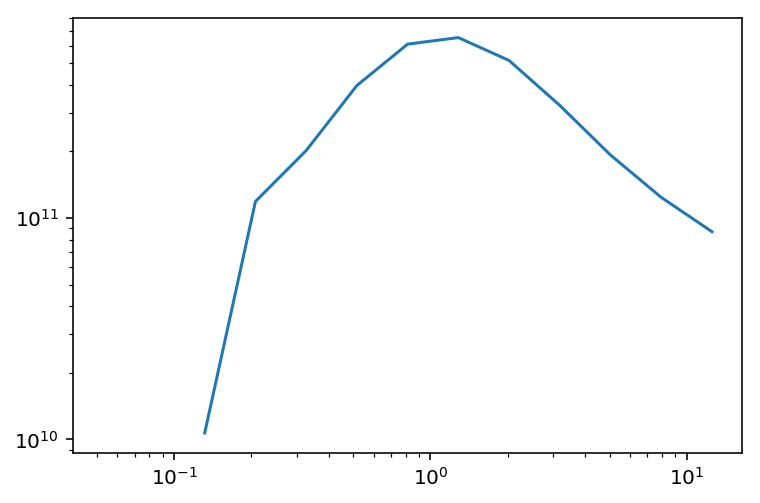

In [17]:
plt.plot(rp,ds[A_to_index(0,0)[0]])
plt.loglog()

In [19]:
ds[A_to_index(0,0)[0]]

array([ -3.56426978e+10,  -2.48813557e+10,   1.06945129e+10,
         1.18876616e+11,   2.01896518e+11,   3.97407078e+11,
         6.11135144e+11,   6.54215180e+11,   5.15573417e+11,
         3.22983371e+11,   1.92726863e+11,   1.24030979e+11,
         8.67944809e+10])

In [20]:
standard_ds = np.mean(ds[A_to_index(0,0)],axis=0)

In [22]:
def ratio_at_r(Acen,Asat,rp_i):
    ratio = np.mean(ds[A_to_index(Acen,Asat)],axis=0)[rp_i]/standard_ds[rp_i]
    return ratio

In [24]:
ratio_all = np.zeros((13,41,41))

In [27]:
for i in range(13):
    for j in range(41):
        for k in range(41):
            ratio_all[i,j,k] = ratio_at_r(-1+0.05*j,-1+0.05*k,i)

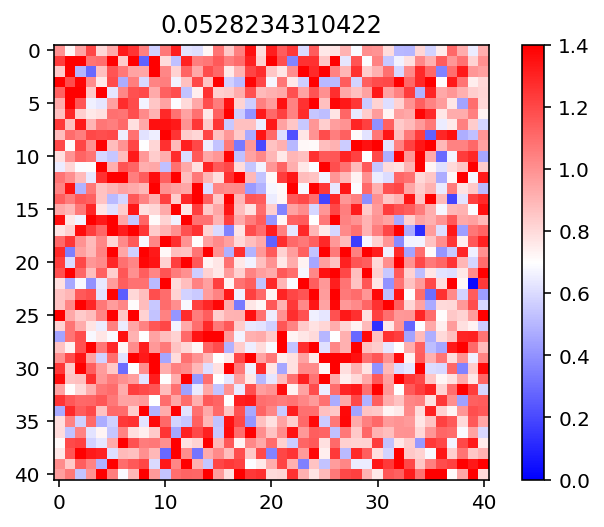

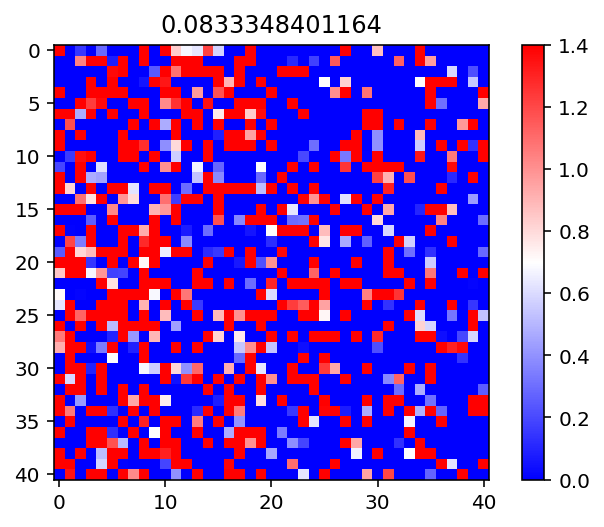

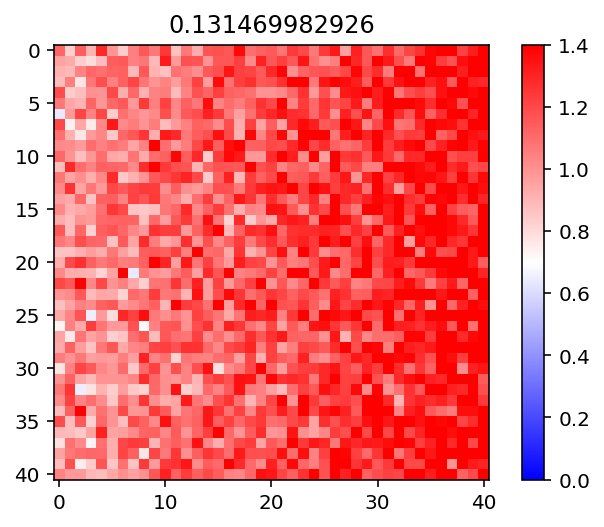

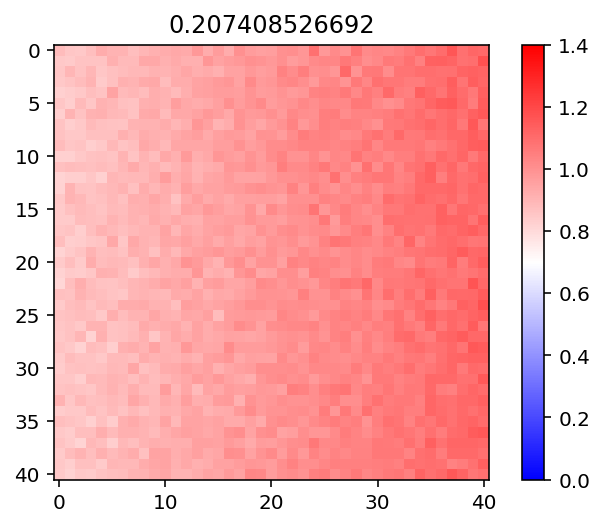

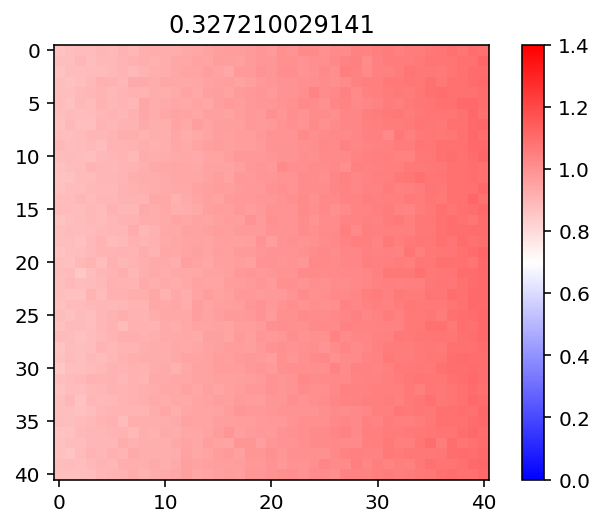

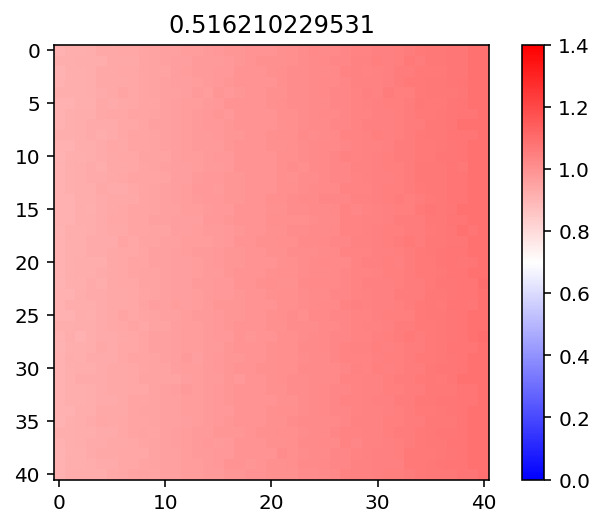

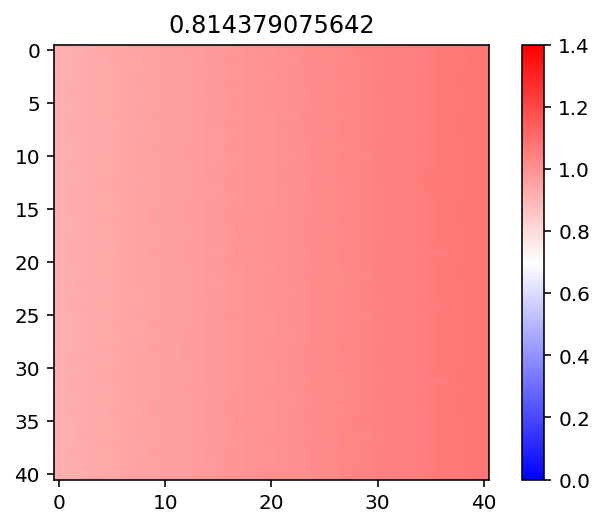

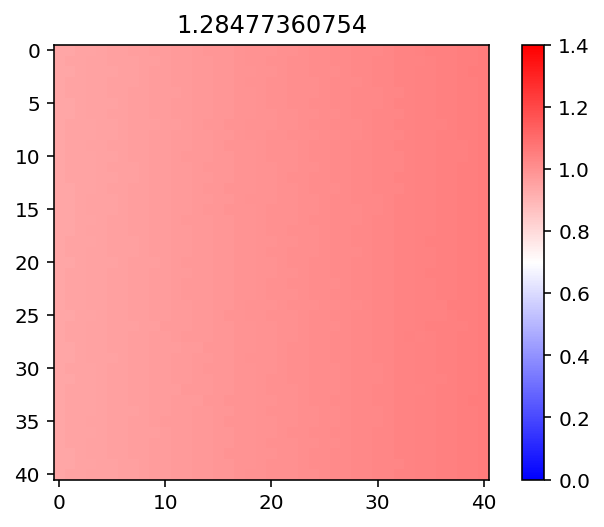

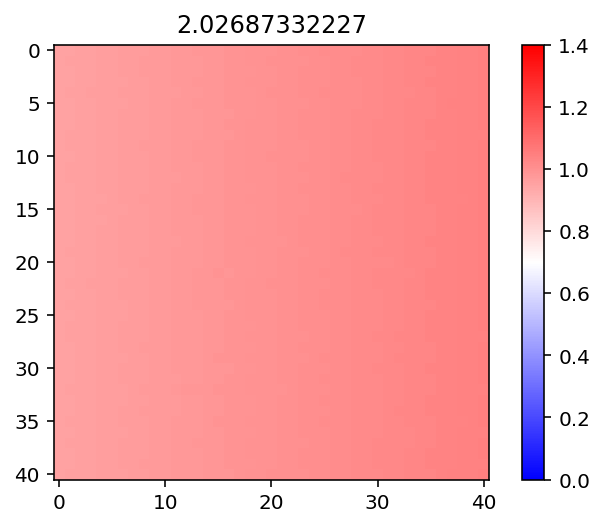

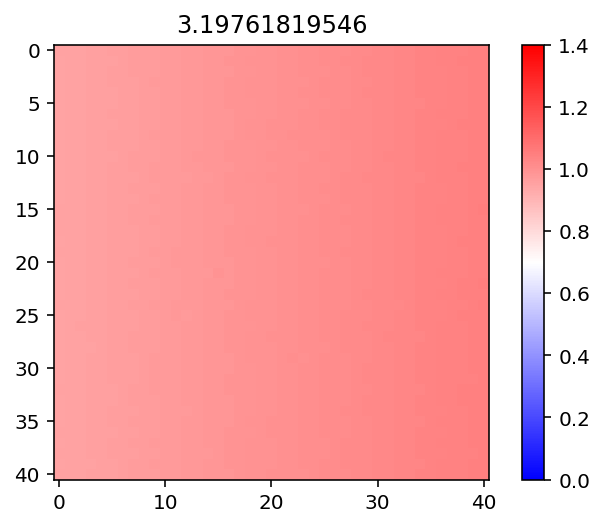

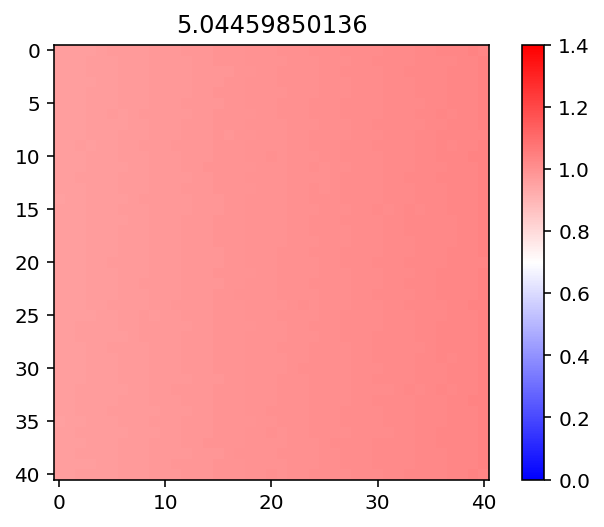

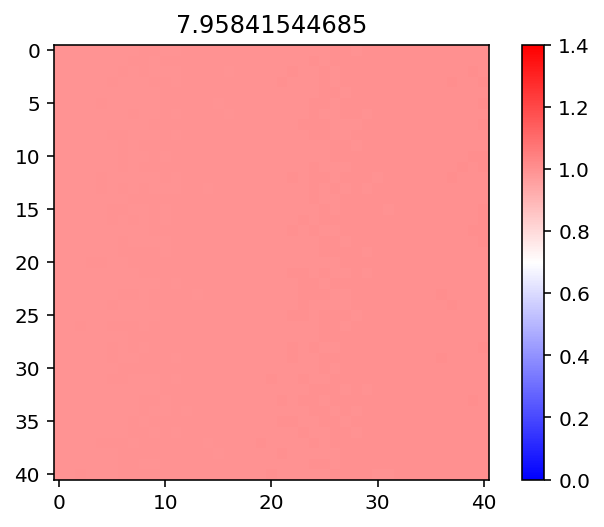

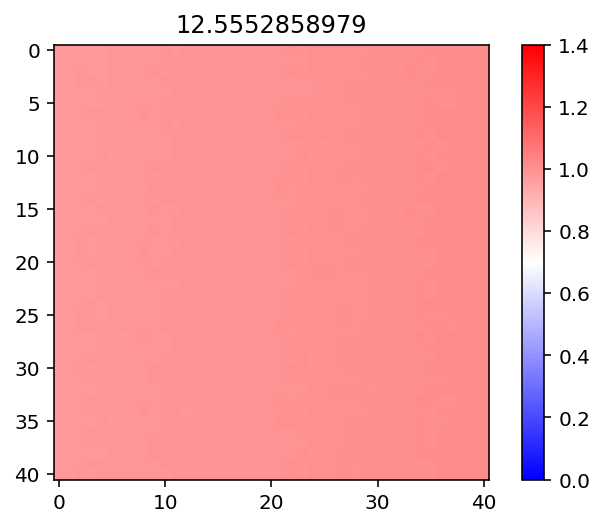

In [40]:
for i in range(13):
    plt.figure()
    plt.imshow(ratio_all[i],cmap='bwr',vmin=0,vmax=1.4,interpolation='None')
    plt.colorbar()
    plt.title(rp[i])

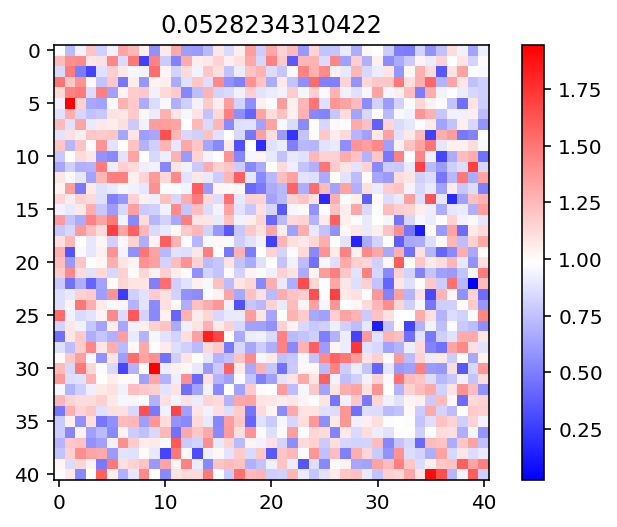

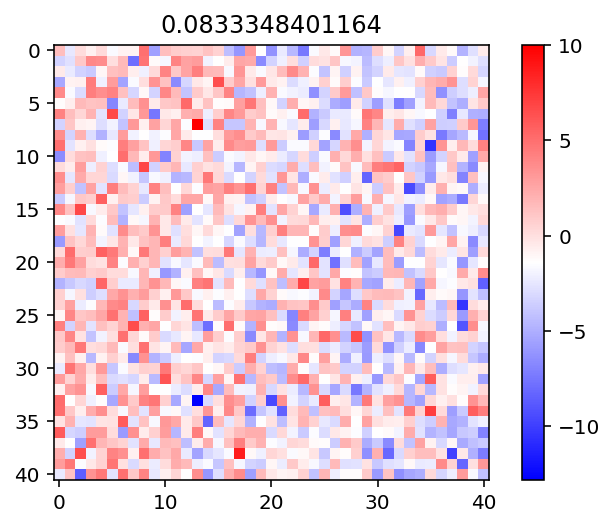

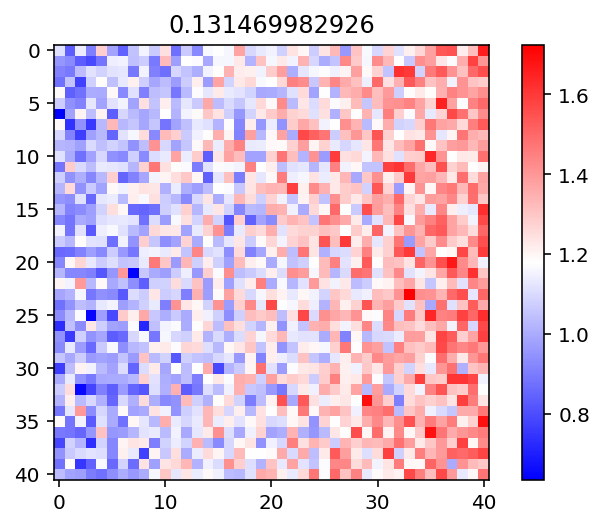

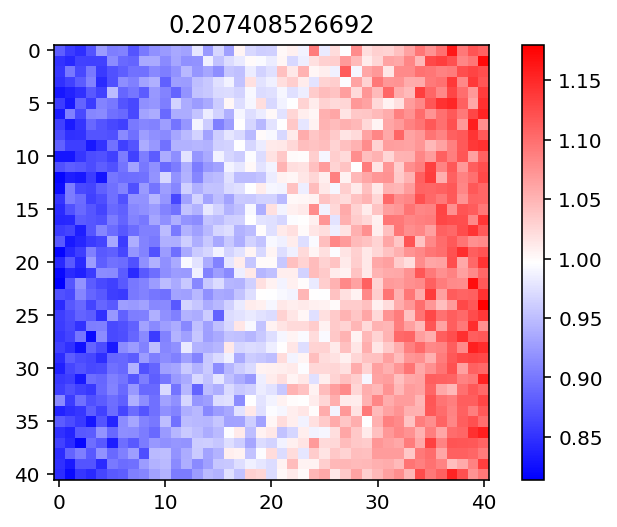

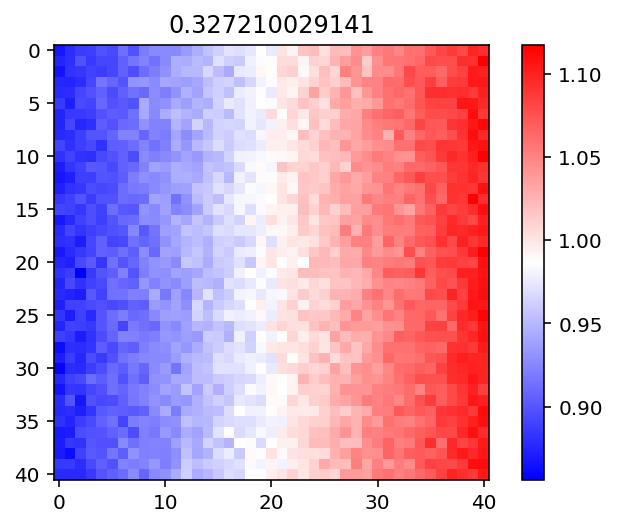

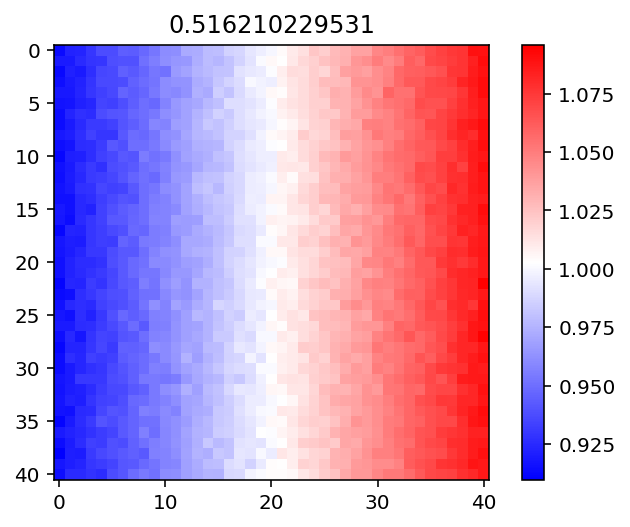

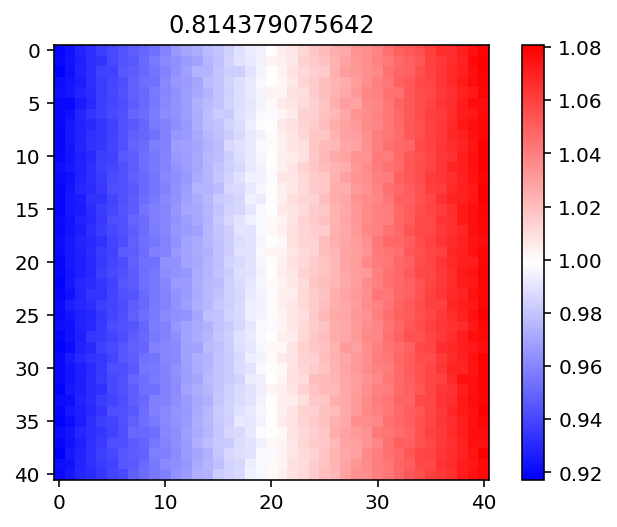

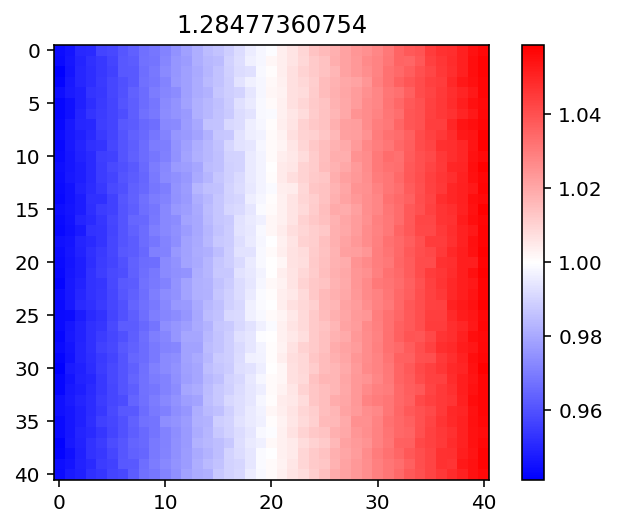

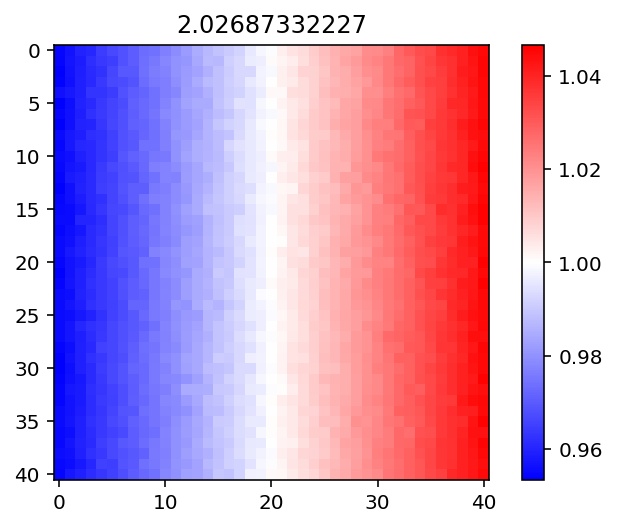

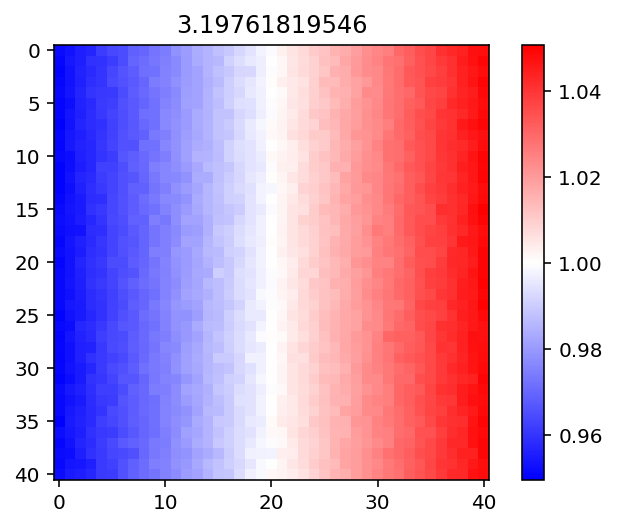

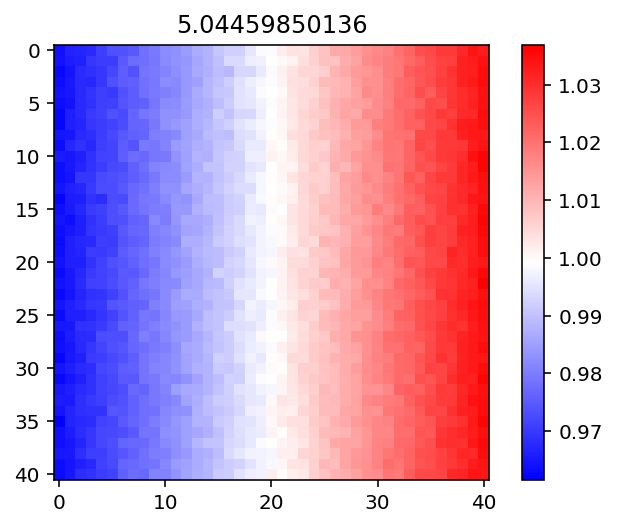

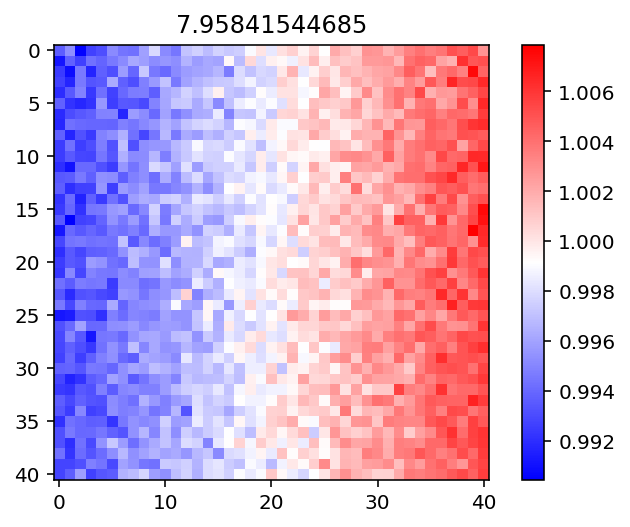

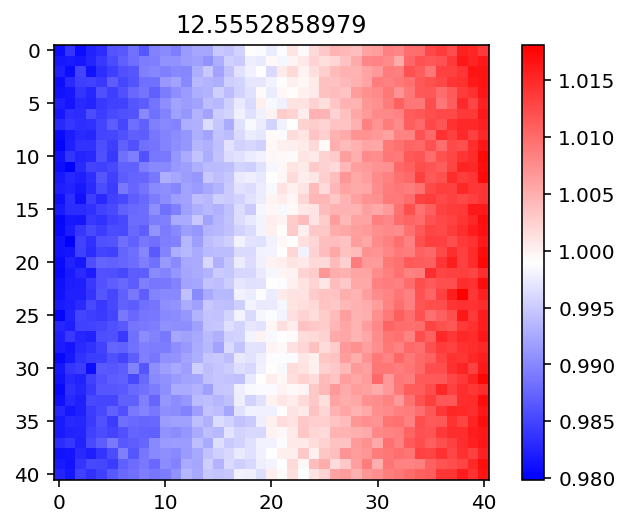

In [41]:
for i in range(13):
    plt.figure()
    plt.imshow(ratio_all[i],cmap='bwr',interpolation='None')
    plt.colorbar()
    plt.title(rp[i])